# Analyse et visualisation de réseaux:

## Import des scripts et description de la base:

Dans ce script, nous allons voir comment calculer les metriques de base décrivant la structure des réseaux, et comment visualiser un réseau.

Pour cela, nous utilserons les réseaux de discussion et d'édition de deux pages du wikipédia anglophonne: 

- Zapata rail (Oiseau Cubain)
- Oil Spill (Marées noires)

On commence par importer les bases pour Zapata rail, qui se trouvent dans le sous dossier *Data*:

In [2]:
zapata_rail_edit_edgelist <- read.csv2(file = "Data/Zapata_rail_edit_edgelist.csv")
zapata_rail_edit_attributes <- read.csv2(file = "Data/Zapata_rail_edit_attributes.csv")

In [3]:
# Options pour les graphes: on modifie la taille

options(repr.plot.width = 15, repr.plot.height = 10)

Comment sont organisées les bases que l'on vient d'importer?

In [4]:
head(zapata_rail_edit_edgelist)

,X,ActiveUser,TargetAuthor,InteractionType,InteractionCount,WordCount
,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,1,Stavenn,Page,ADDED,2,189
2,2,217.12.16.48,Page,ADDED,1,3
3,3,217.12.16.49,Page,ADDED,1,27
4,5,Stavenn,217.12.16.49,DELETED,1,12
5,6,Stavenn,217.12.16.48,DELETED,1,3
6,7,Stavenn,Stavenn,DELETED,1,4


La base "edgelist" décrit une suite d'action qui ont lieux sur la page. Ici, le réseau d'édition est organisé de la manière suivante: 

Les contributeurs peuvent effectuer trois types d'action sur une page, pour chaque action, le type est décrit dans la variable InteractionType: 

- ADDED: Ajout de texte à la page, la cible est toujours le noeud "page".
- DELETED: Suppression de texte, la cible est l'auteur du texte original.
- RESTORED: Annule une suppression ou modification de texte. La cible est l'auteur original du texte qui est restauré.

On peut voir leur distribution à l'aide de la fonction table(base$variable):


In [5]:
table(zapata_rail_edit_edgelist$InteractionType)


   ADDED  DELETED RESTORED 
      87      223       61 

Les contributeurs (ActiveUser) effectuent ainsi toujours une action envers un autre contributeur, ou la page. La cible de l'action est décrite dans la variable TargetAuthor.

Dans le but de simplifier les bases, j'ai regroupé les actions similaires (ex: l'utilisateur x reverse trois fois du texte écrit par y). La variable InteractionCount décrit le nombre total d'actions similaires décrites par la ligne.

La variable Wordcount décrit le nombre total de mots concernés par la ligne (ajouté à la page pour un ADD, supprimés pour un DELETE, etc.)

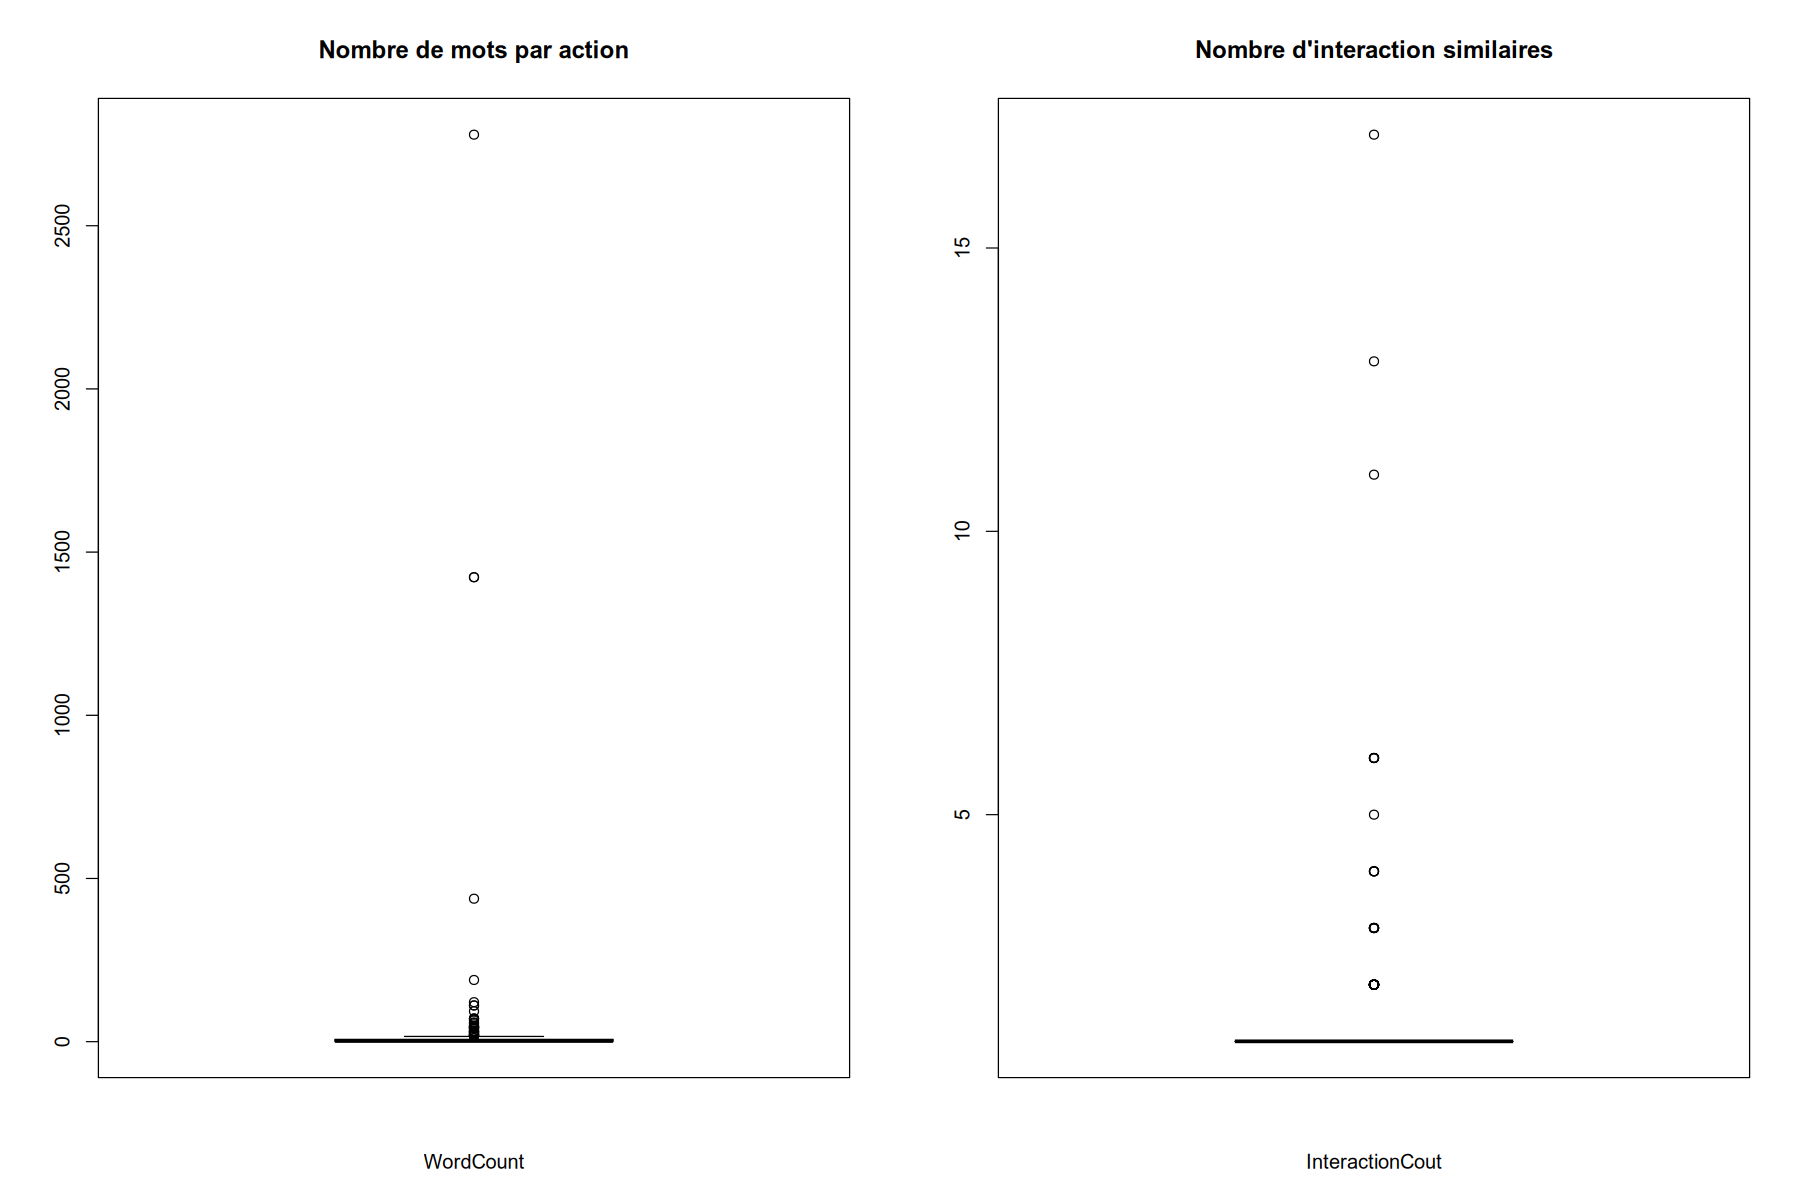

In [6]:
# Pour avoir deux graphes côte à côte:

par(mfrow=c(1,2))

boxplot(zapata_rail_edit_edgelist$WordCount, xlab = "WordCount",
        main = "Nombre de mots par action")

boxplot(zapata_rail_edit_edgelist$InteractionCount, xlab = "InteractionCout",
        main = "Nombre d'interaction similaires")

par(mfrow=c(1,1))

In [7]:
head(zapata_rail_edit_attributes)

,X,Users,Status,TotalWordCount
,<int>,<chr>,<chr>,<int>
1,1,Stavenn,User,189
2,110,Page,Page,0
3,2,217.12.16.48,Anon,3
4,3,217.12.16.49,Anon,27
5,4,Smallweed,User,8
6,5,Birdingcuba64~enwiki,User,16


La base d'attributs décrit les charactéristiques des utilisateurs listés dans le réseau d'édition. Là ou la base *edgelist* nous montre une ligne par action, ici, la base nous montre une ligne par contributeur unique qui a modifié à un moment la page Zapata Rail.

La base nous donne le statut du contributeur ($Status). Celui ci peut être:

- Anon: Contributeur anonyme, non inscrit sur wikipédia. Il est identifié par l'adresse IP utilisée lors de la modification.
- Page: La page apparait dans la liste des attributs pour des raisons techniques. Elle n'a évidemment pas d'autres caractéristiques que d'être "la page".
- Admin: Administrateurs wikipédia: utilisateurs élus disposant de droits d'édition et de modération élargis.
- Bot: Robots pour la mise en forme, la correction, et l'édition automatique.
- Users: Contributeurs inscrits, identifiés par leur pseudos.

On observe la distribution des status des auteurs de la page à l'aide de la fonction table:

In [8]:
table(zapata_rail_edit_attributes$Status)


Admin  Anon   Bot  Page  User 
   12    16    10     1    71 

La variable TotalWordCount nous donne le nombre total de mots contribués par l'utilisateur à la page (ADD uniquement donc).

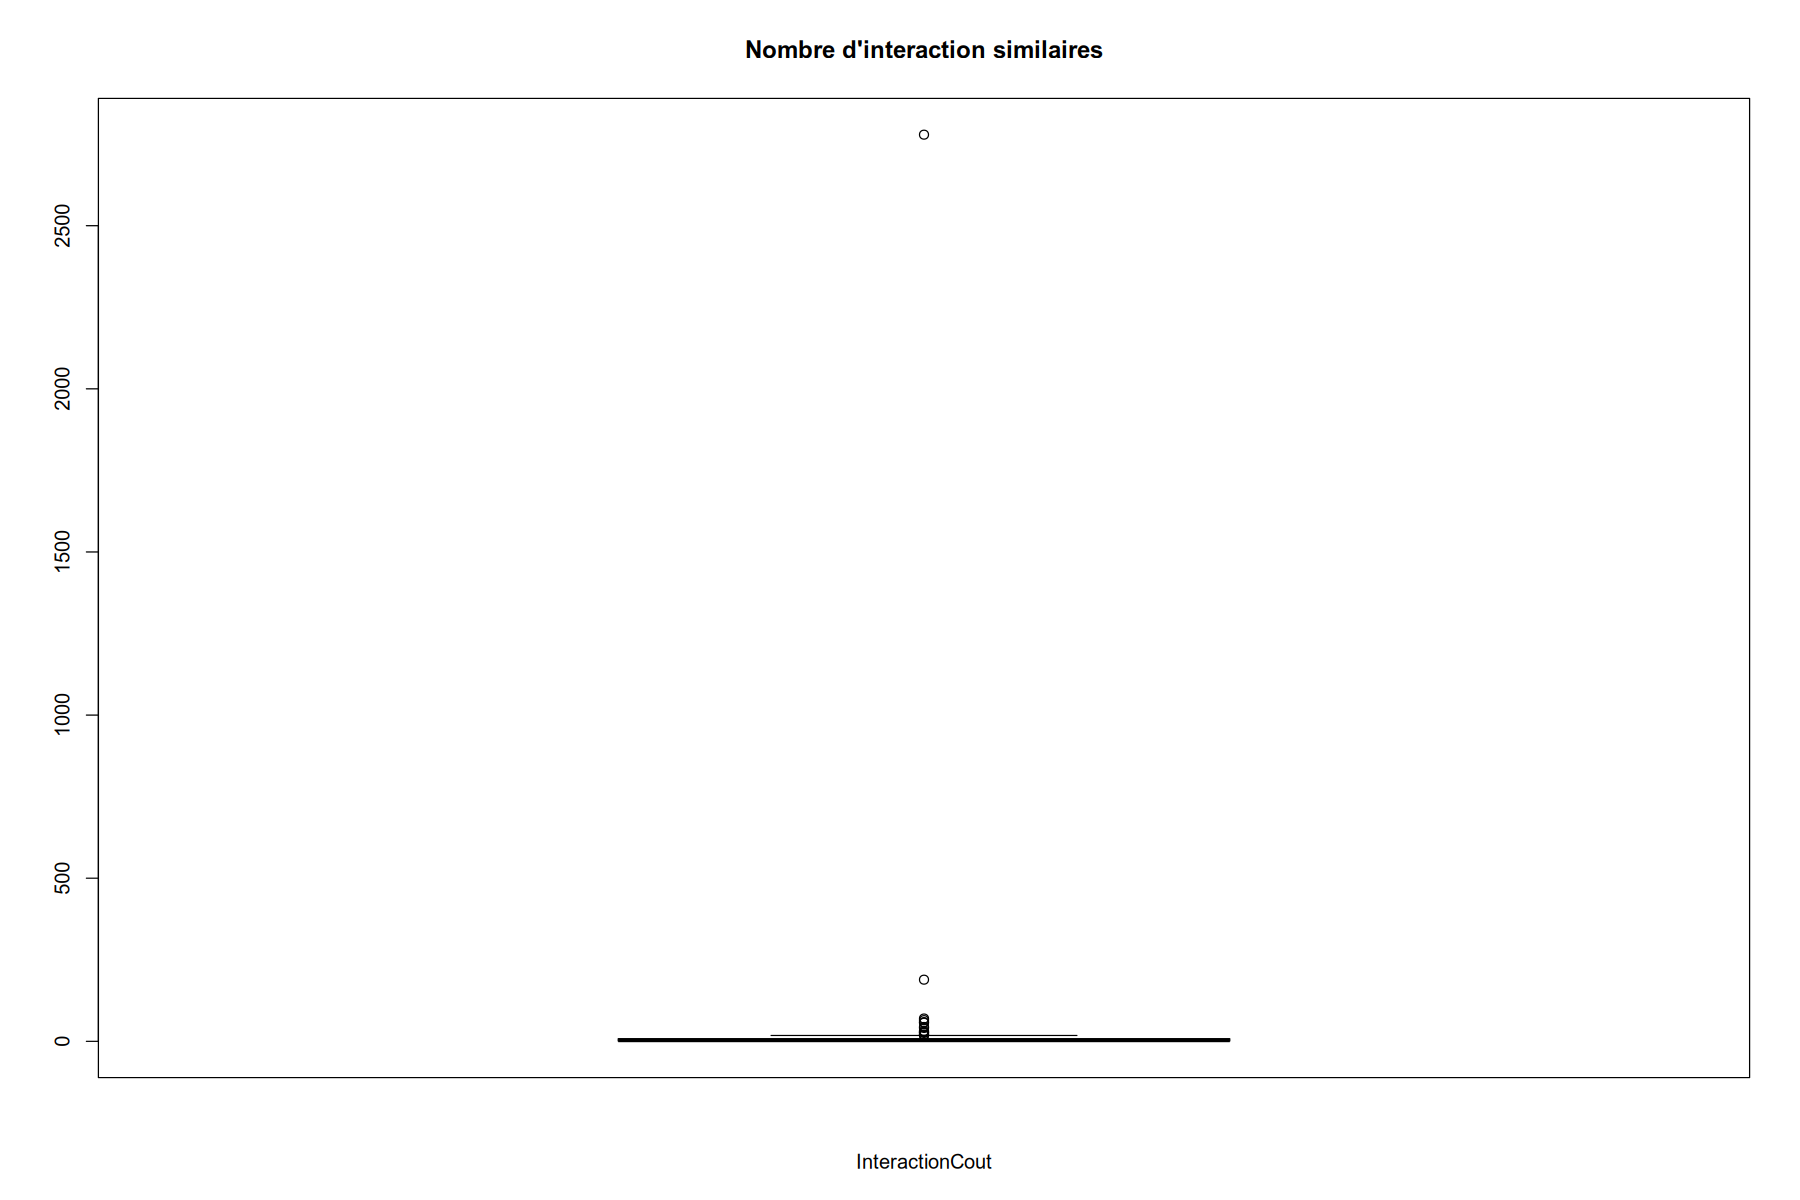

In [9]:
boxplot(zapata_rail_edit_attributes$TotalWordCount, xlab = "InteractionCout",
        main = "Nombre d'interaction similaires")

## Visualisation du graphe:

On peut maintenant commencer à regarder le réseau. Le package R que l'on utilise pour ce cours est igraph. Il faut en premier lieu le charger avec la commande library(package), en prenant soin de ne charger que les colonnes décrivant une action (lien), ici, les colonnes 1 et 2:

In [10]:
library(igraph)


Attachement du package : ‘igraph’


Les objets suivants sont masqués depuis ‘package:stats’:

    decompose, spectrum


L'objet suivant est masqué depuis ‘package:base’:

    union




Il nous faut ensuite charger la base qui décrit les liens (notre base 'edgelist')  dans un objet graphe:

In [11]:
zapata_rail_edit_graphe <- graph.edgelist(as.matrix(zapata_rail_edit_edgelist[,2:3]))

On peut ensuite regarder ce qu'il y  a dans l'objet graphe que l'on vient de créer:

In [12]:
summary(zapata_rail_edit_graphe)

IGRAPH 3ea6eb2 DN-- 110 371 -- 
+ attr: name (v/c)


**Lecture de la sortie:** C'est un DN (*Directed Network* = Réseau dirigé), qui comporte 110 noeuds, et 371 liens.  Il ne comporte pour l'instant pas d'attributs (pour l'instant), à part *name* qui décrit le nom des noeuds.

On peut réaliser une première représentation du graphe avec la commande plot:

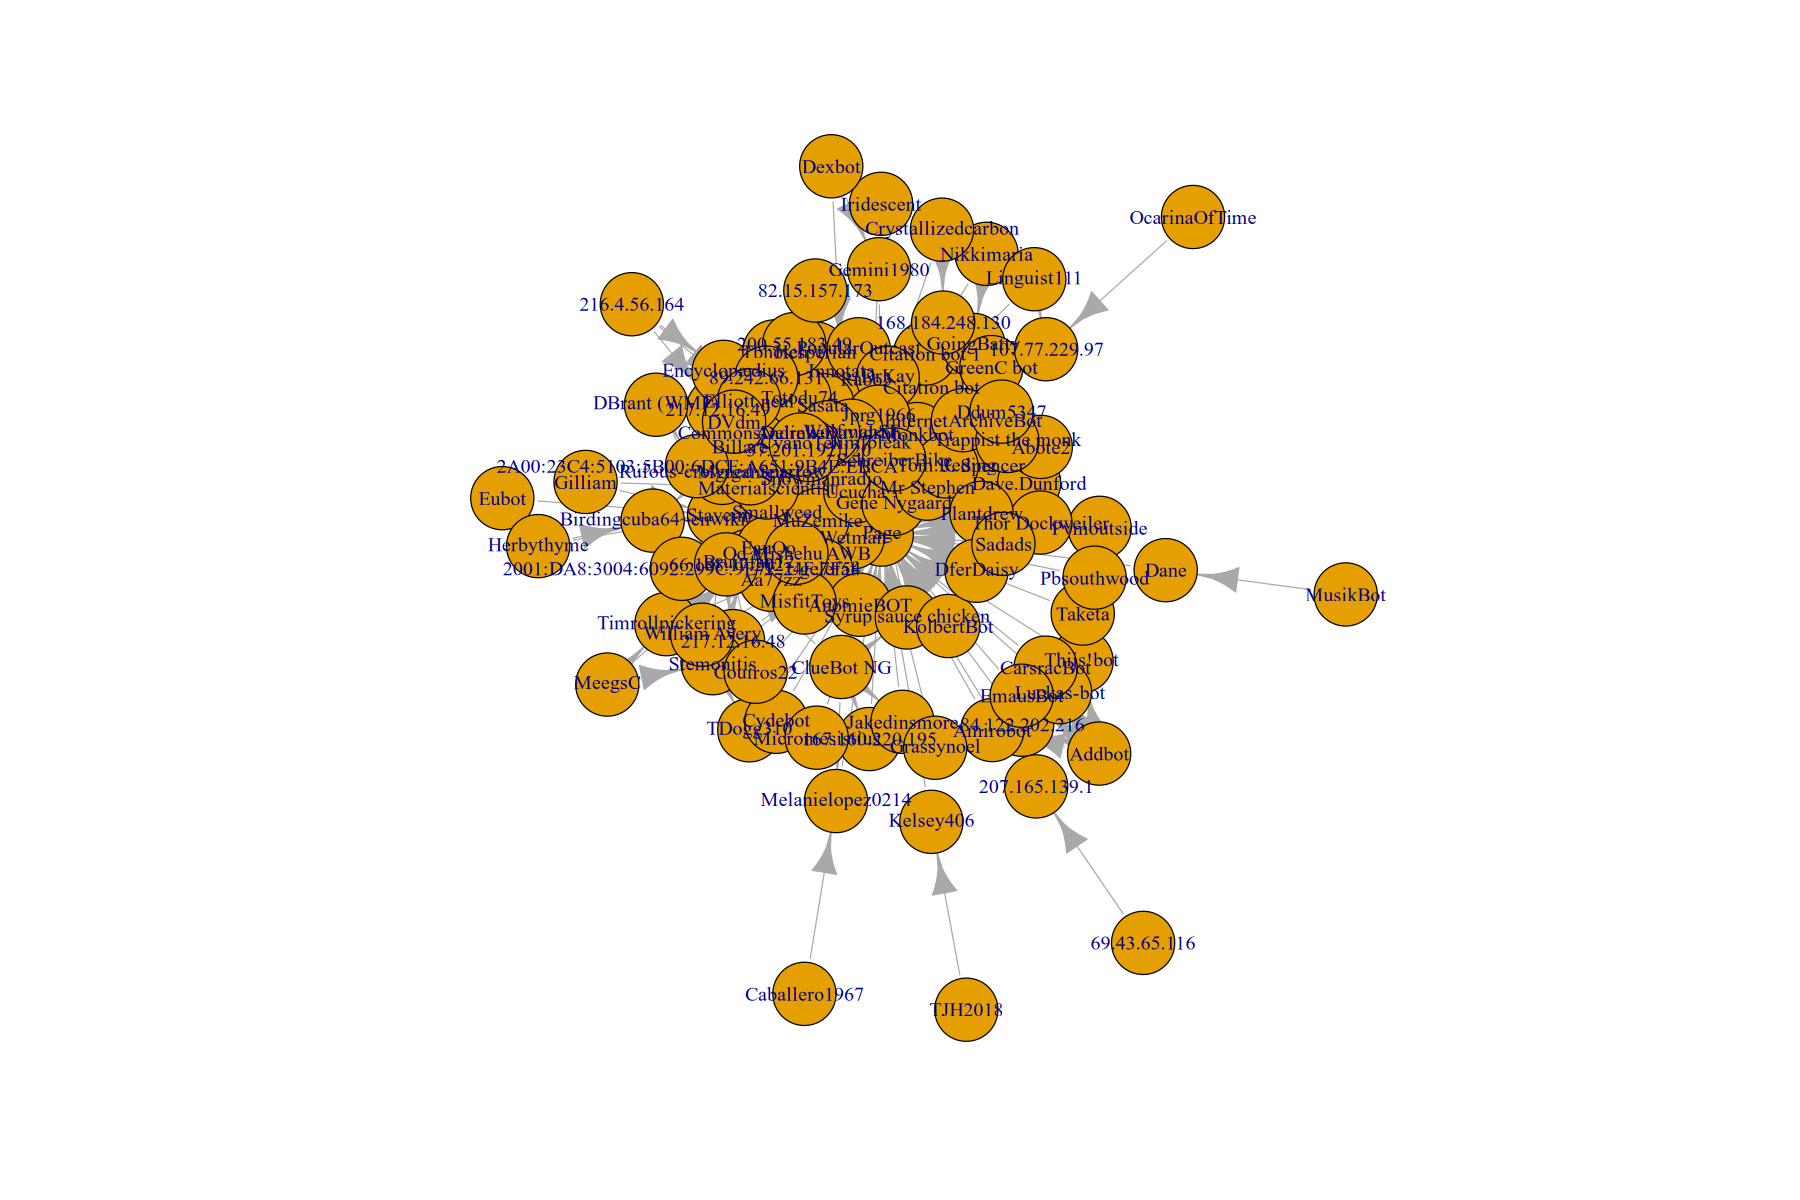

In [13]:
plot(zapata_rail_edit_graphe)

Problème, c'est assez peu lisible...

On peut ajuster le graphe en ajoutant des arguments à la fonction plot. 

On peut enlever les labels:

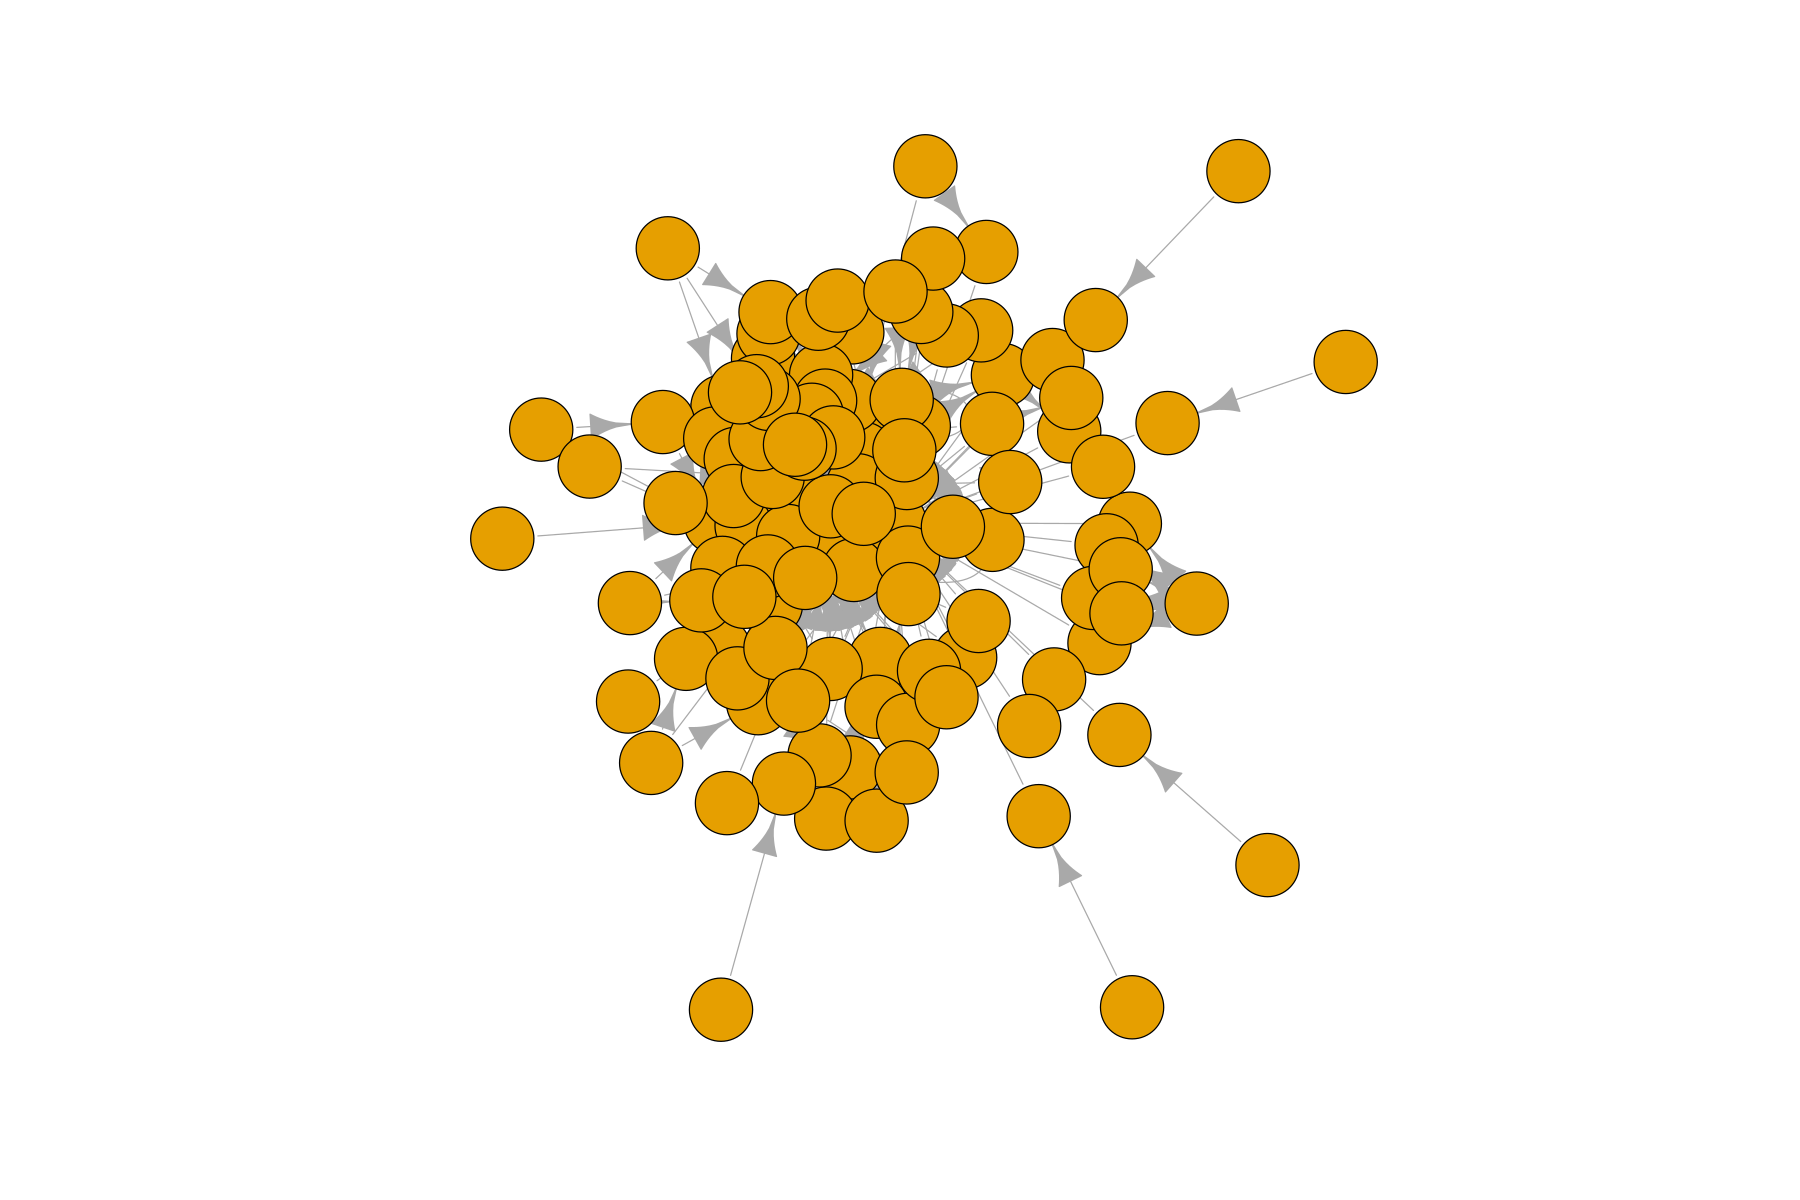

In [14]:
plot(zapata_rail_edit_graphe,
     vertex.label= NA)

Réduire la taille des arrêtes (edge) et des noeuds (vertex) :

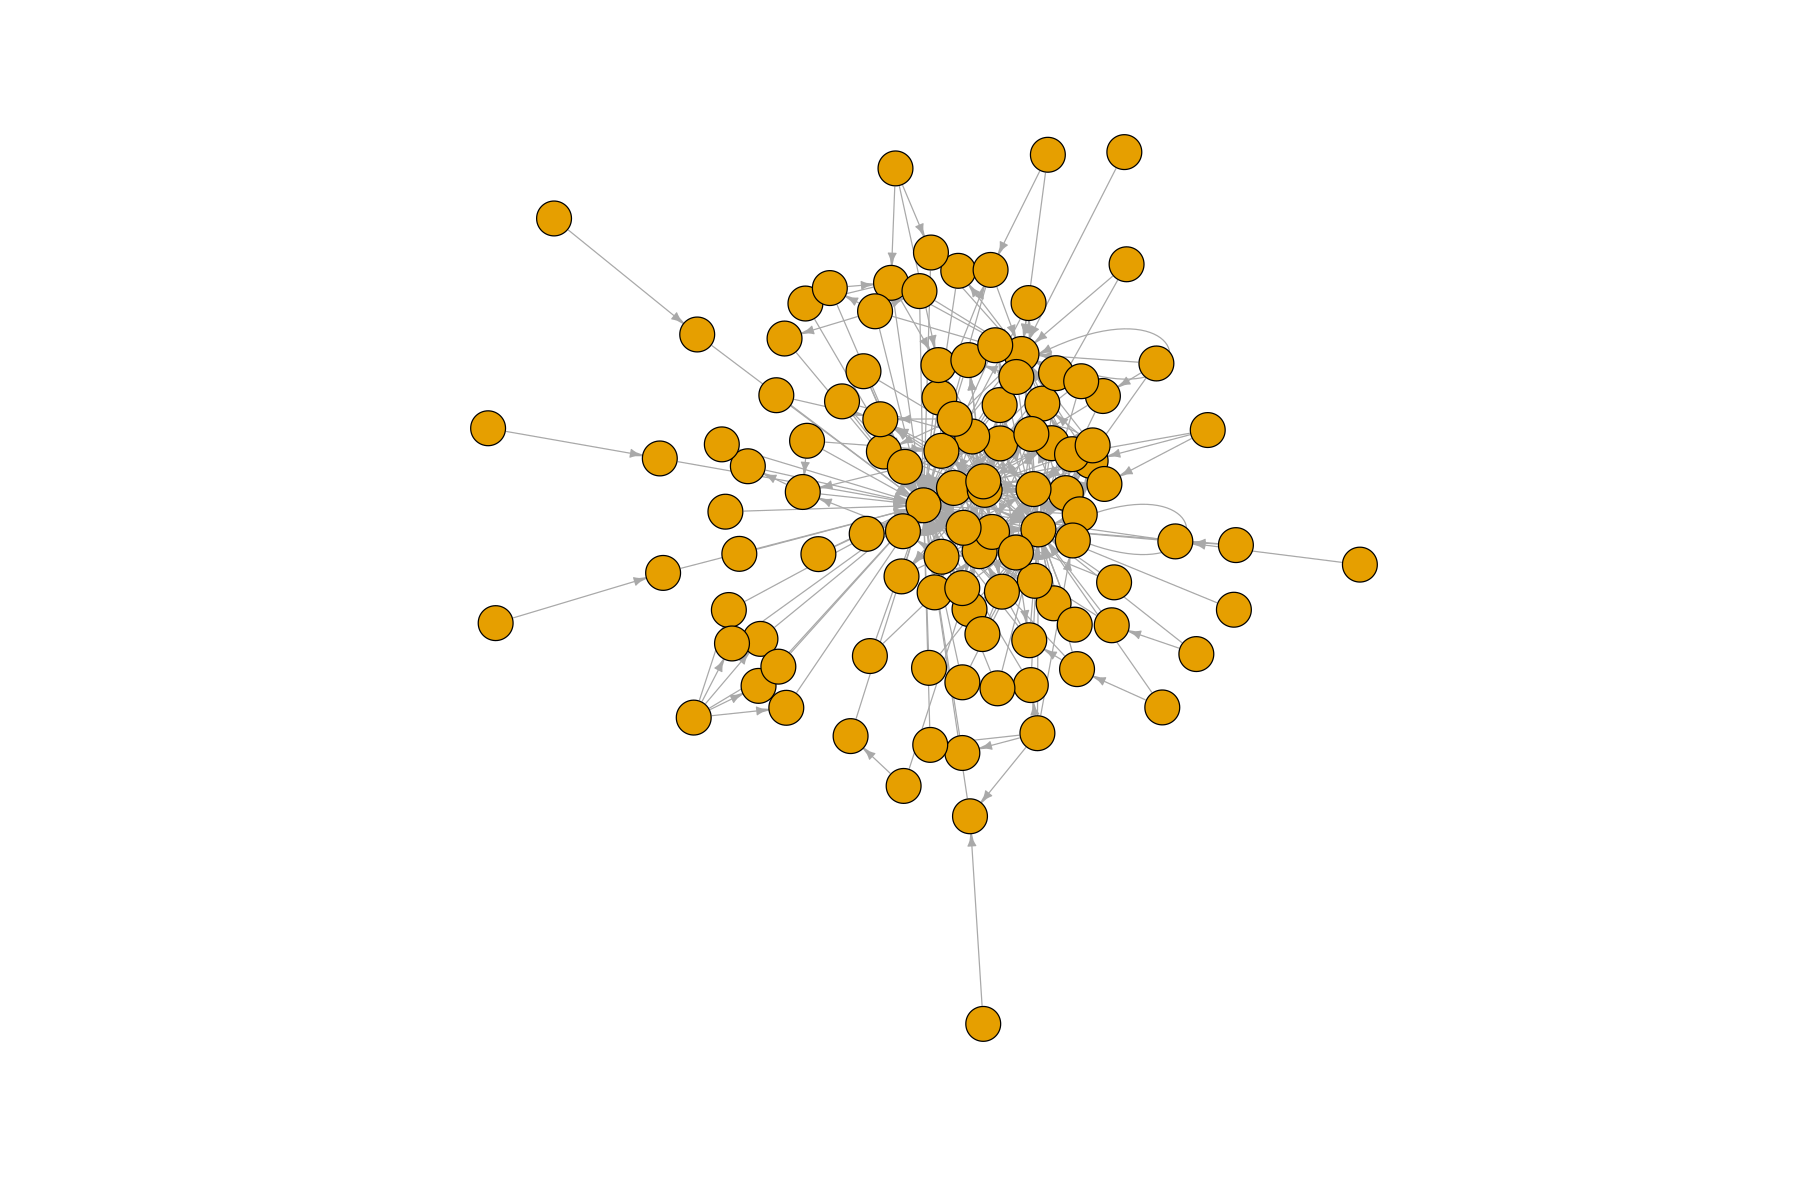

In [15]:
plot(zapata_rail_edit_graphe,
     edge.arrow.size=.3,
     vertex.size = 8,
     vertex.label= NA)

On peut aussi visualiser les attributs des noeuds et des liens directement sur le graphe, à l'aide de conventions graphiques.

Il faut d'abord les charger depuis leurs bases respectives dans l'objet graphe (edgelist pour les liens et attributes pour les noeuds): Ci dessous, V appelle l'objet noeuds et E l'objet liens: 

In [16]:
# On charge le status des contributeurs:

V(zapata_rail_edit_graphe)$Status <- zapata_rail_edit_attributes$Status

# Le nombre total de mots contribués à la page

V(zapata_rail_edit_graphe)$TotalWordCount <- zapata_rail_edit_attributes$TotalWordCount

# Le nombre d'"Actions" contenues dans un lien (nombre de fois que ce lien exact a lieu)

E(zapata_rail_edit_graphe)$IterationCount <- zapata_rail_edit_edgelist$InteractionCount

# Le type d'action: ADD, DELETE ou REVERSE?

E(zapata_rail_edit_graphe)$InteractionType <- zapata_rail_edit_edgelist$InteractionType

# On isole la page:

V(zapata_rail_edit_graphe)$Page <- ifelse(zapata_rail_edit_attributes$Users == "Page", 'square', 'circle')

On peut ensuite ajouter ces attributs au graphe, sous la forme que l'on veut:
Ici, je choisis de faire varier la taille des liens en fonction du nombre d'"Actions" contenues dans un lien, la taille des noeuds en fonction du nombre total de mots qu'ils ont ajoutés à la page, et la couleur des noeuds en fonction de leur statut.

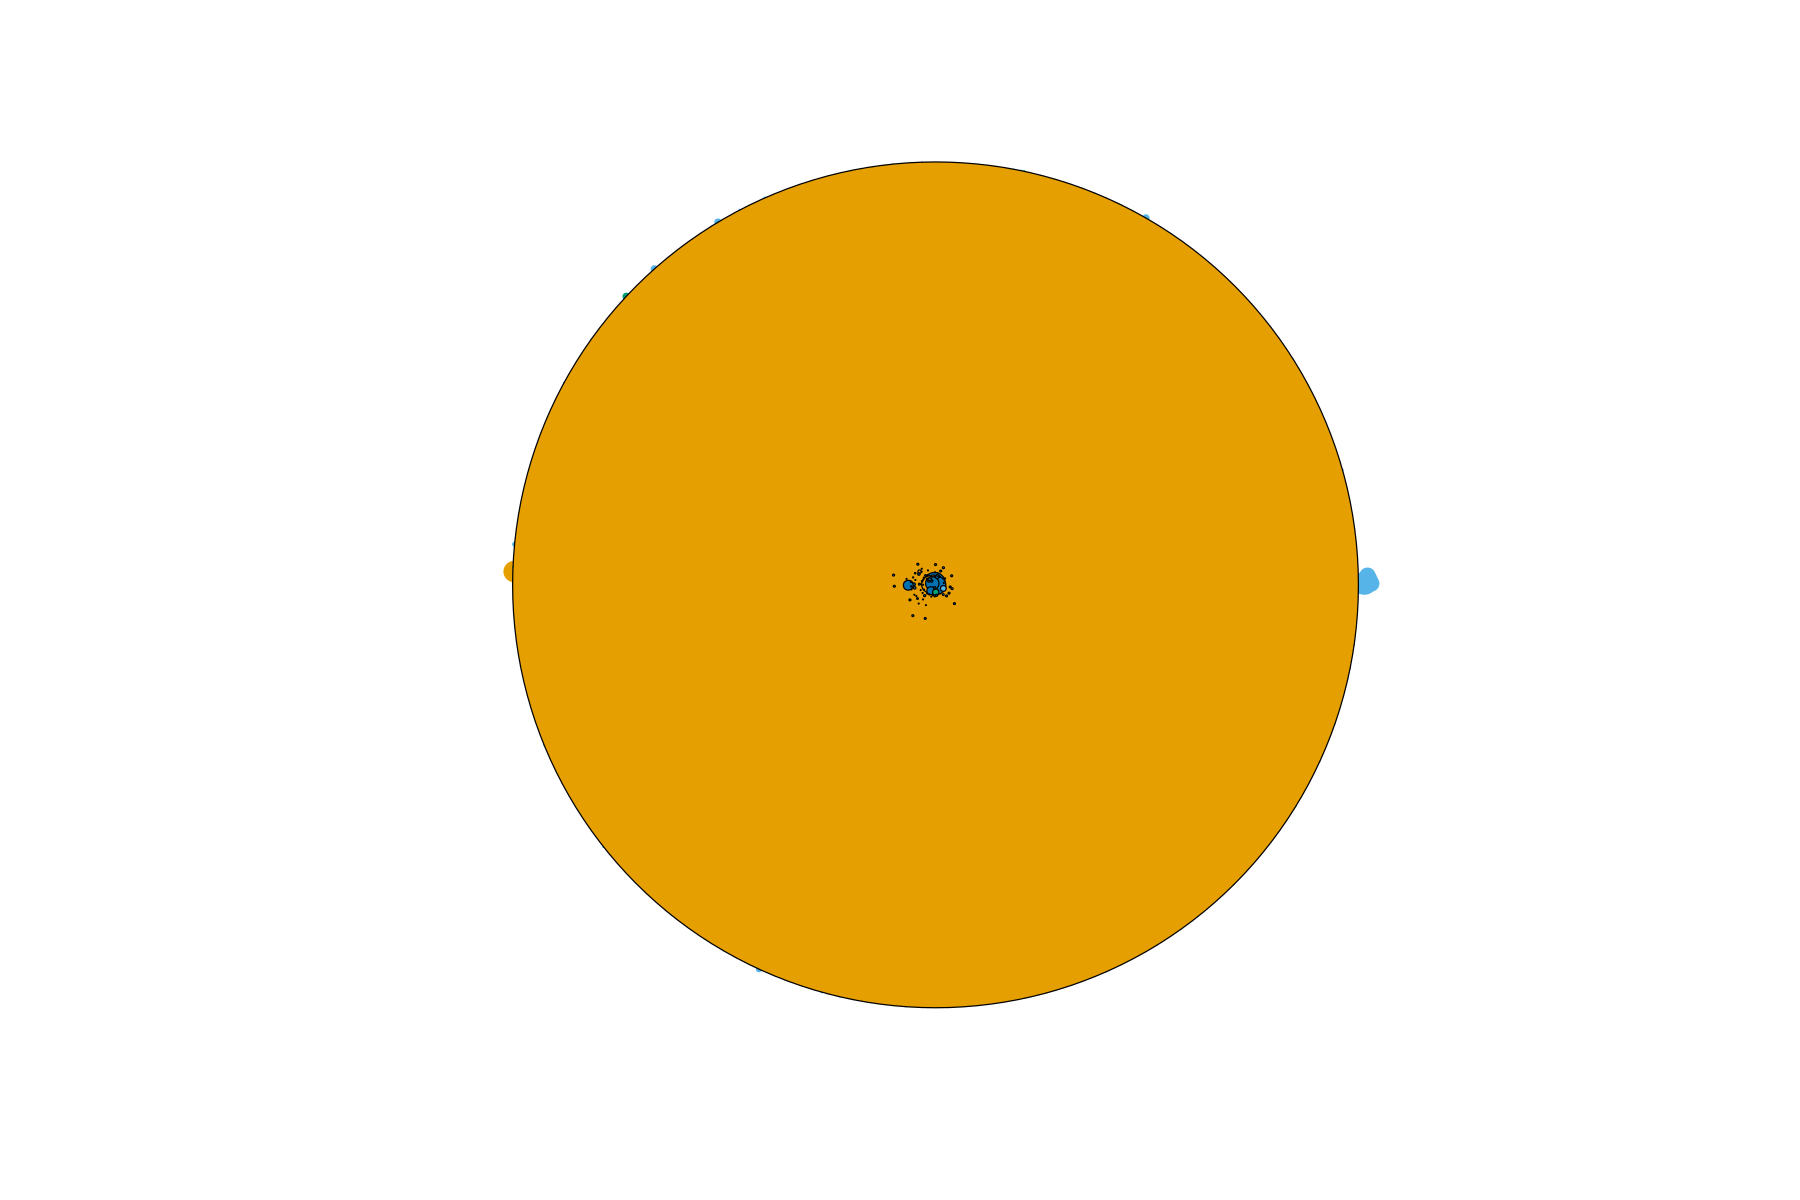

In [17]:
plot(zapata_rail_edit_graphe,
     edge.arrow.size = .3,
     edge.width = E(zapata_rail_edit_graphe)$IterationCount,
     edge.color = as.factor(E(zapata_rail_edit_graphe)$InteractionType),
     vertex.size = V(zapata_rail_edit_graphe)$TotalWordCount,
     vertex.color = as.factor(V(zapata_rail_edit_graphe)$Status),
     vertex.label = NA)

Problème, notre taille de noeuds a une amplitude beaucoup trop importante. Plusieurs solutions existent, on peut prendre le log, on peut centrer-réduire. Ici, je prends le log * 2, +4 pour que la taille minimale des points soit de 4:

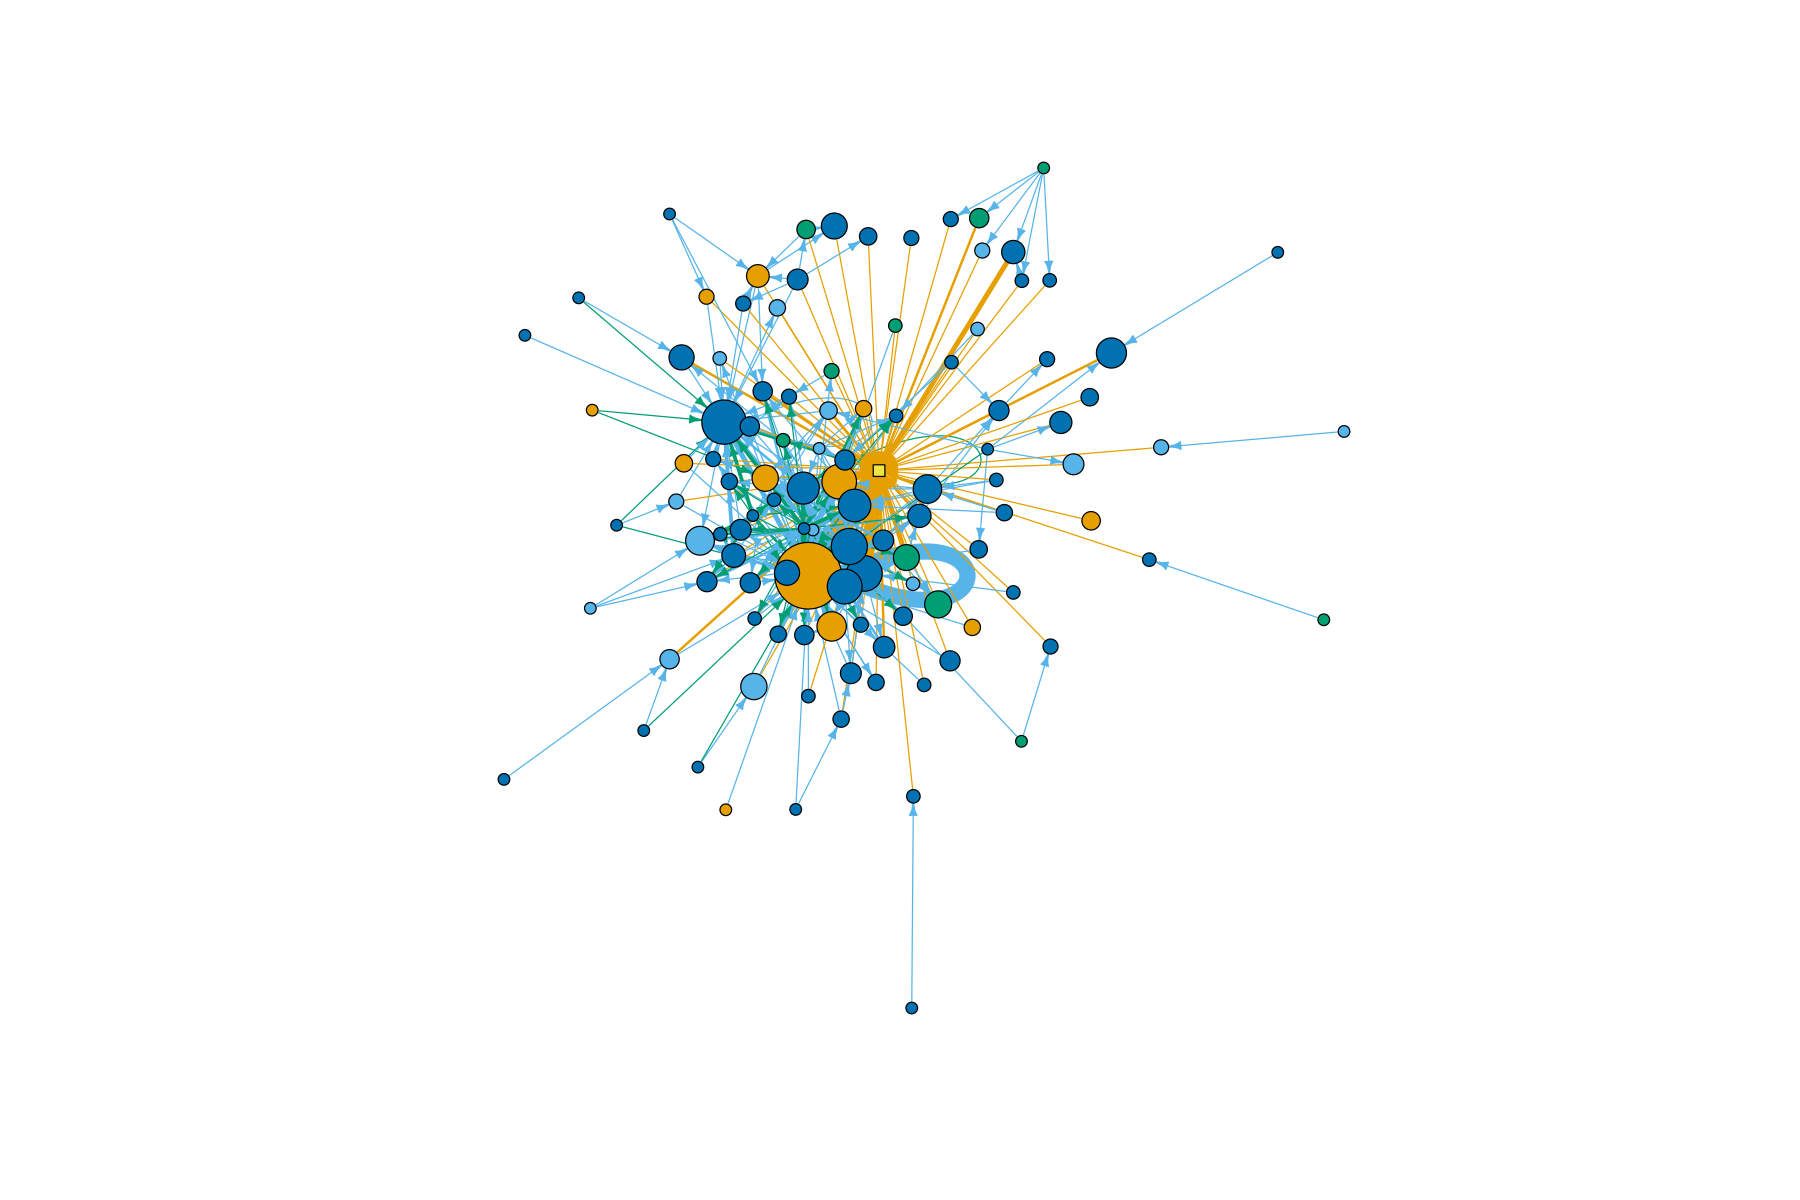

In [18]:
plot(zapata_rail_edit_graphe,
     edge.arrow.size = .3,
     edge.width = E(zapata_rail_edit_graphe)$IterationCount,
     edge.color = as.factor(E(zapata_rail_edit_graphe)$InteractionType),
     vertex.size = log(V(zapata_rail_edit_graphe)$TotalWordCount + 4) * 2,
     vertex.color = as.factor(V(zapata_rail_edit_graphe)$Status),
     vertex.label = NA,
     vertex.shape = V(zapata_rail_edit_graphe)$Page)

Problème: On ne sait pas trop quelles couleurs correspondent à quel statut ou a quelle interaction...
On peut définir des vecteurs de couleur à la main, en choisissant les correspondances:

In [19]:
E(zapata_rail_edit_graphe)$Color_edge[E(zapata_rail_edit_graphe)$InteractionType == "ADDED"] <- "#3892e0"
E(zapata_rail_edit_graphe)$Color_edge[E(zapata_rail_edit_graphe)$InteractionType == "DELETED"] <- "#da4d45"
E(zapata_rail_edit_graphe)$Color_edge[E(zapata_rail_edit_graphe)$InteractionType == "RESTORED"] <- "#fbd25d"

V(zapata_rail_edit_graphe)$Color_nodes[V(zapata_rail_edit_graphe)$Status == "Anon"] <- "white"
V(zapata_rail_edit_graphe)$Color_nodes[V(zapata_rail_edit_graphe)$Status == "User"] <- "#f37329"
V(zapata_rail_edit_graphe)$Color_nodes[V(zapata_rail_edit_graphe)$Status == "Bot"] <- "#93d844"
V(zapata_rail_edit_graphe)$Color_nodes[V(zapata_rail_edit_graphe)$Status == "Admin"] <- "#8a4ebf"
V(zapata_rail_edit_graphe)$Color_nodes[V(zapata_rail_edit_graphe)$Status == "Page"]<- "#333333"

Et les appliquer à notre graphe précédant:

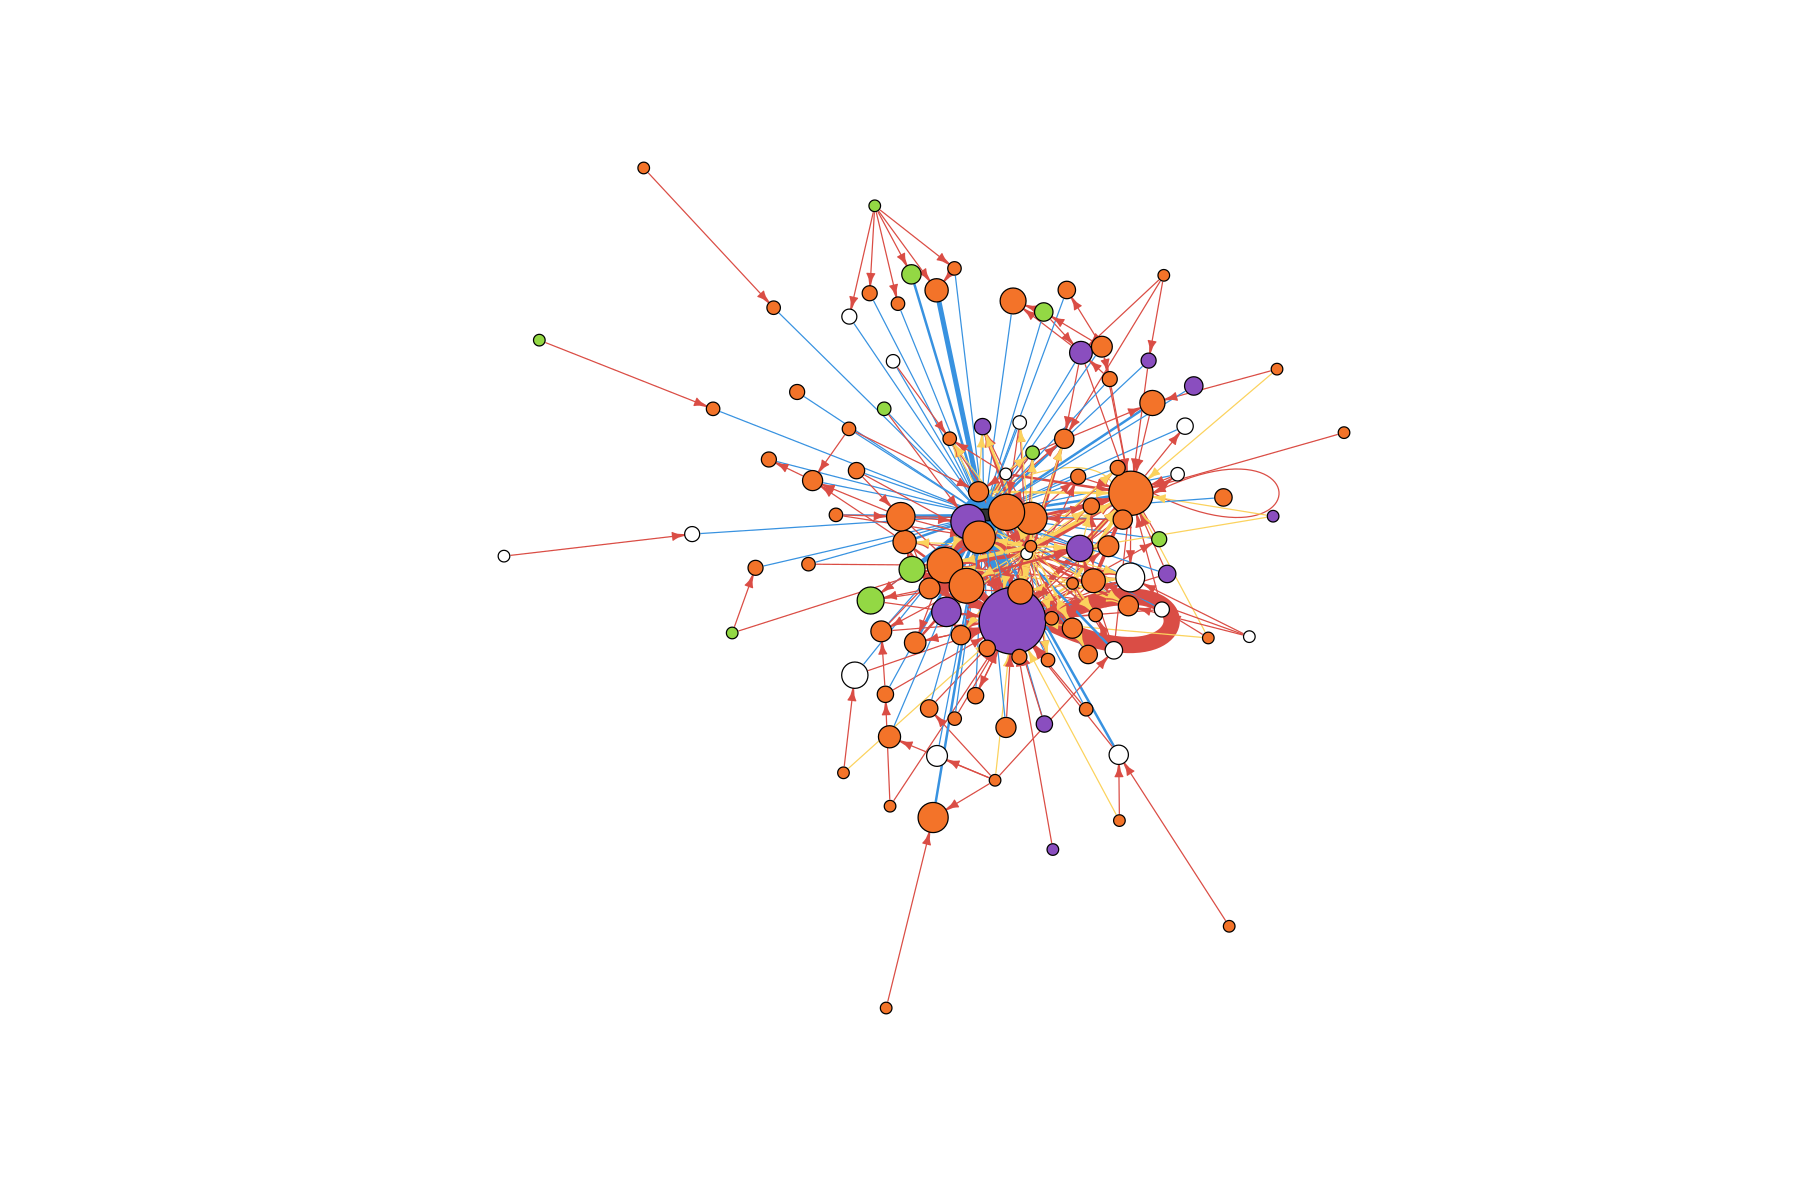

In [20]:
plot(zapata_rail_edit_graphe,
     edge.arrow.size = .3,
     edge.width = E(zapata_rail_edit_graphe)$IterationCount,
     edge.color = E(zapata_rail_edit_graphe)$Color_edge,
     vertex.size = log(V(zapata_rail_edit_graphe)$TotalWordCount + 4) * 2,
     vertex.color = V(zapata_rail_edit_graphe)$Color_nodes,
     vertex.label = NA,
     vertex.shape = V(zapata_rail_edit_graphe)$Page)

On peut rajouter une légende qui décrit les marques l'on a ajouté à la visualisation:

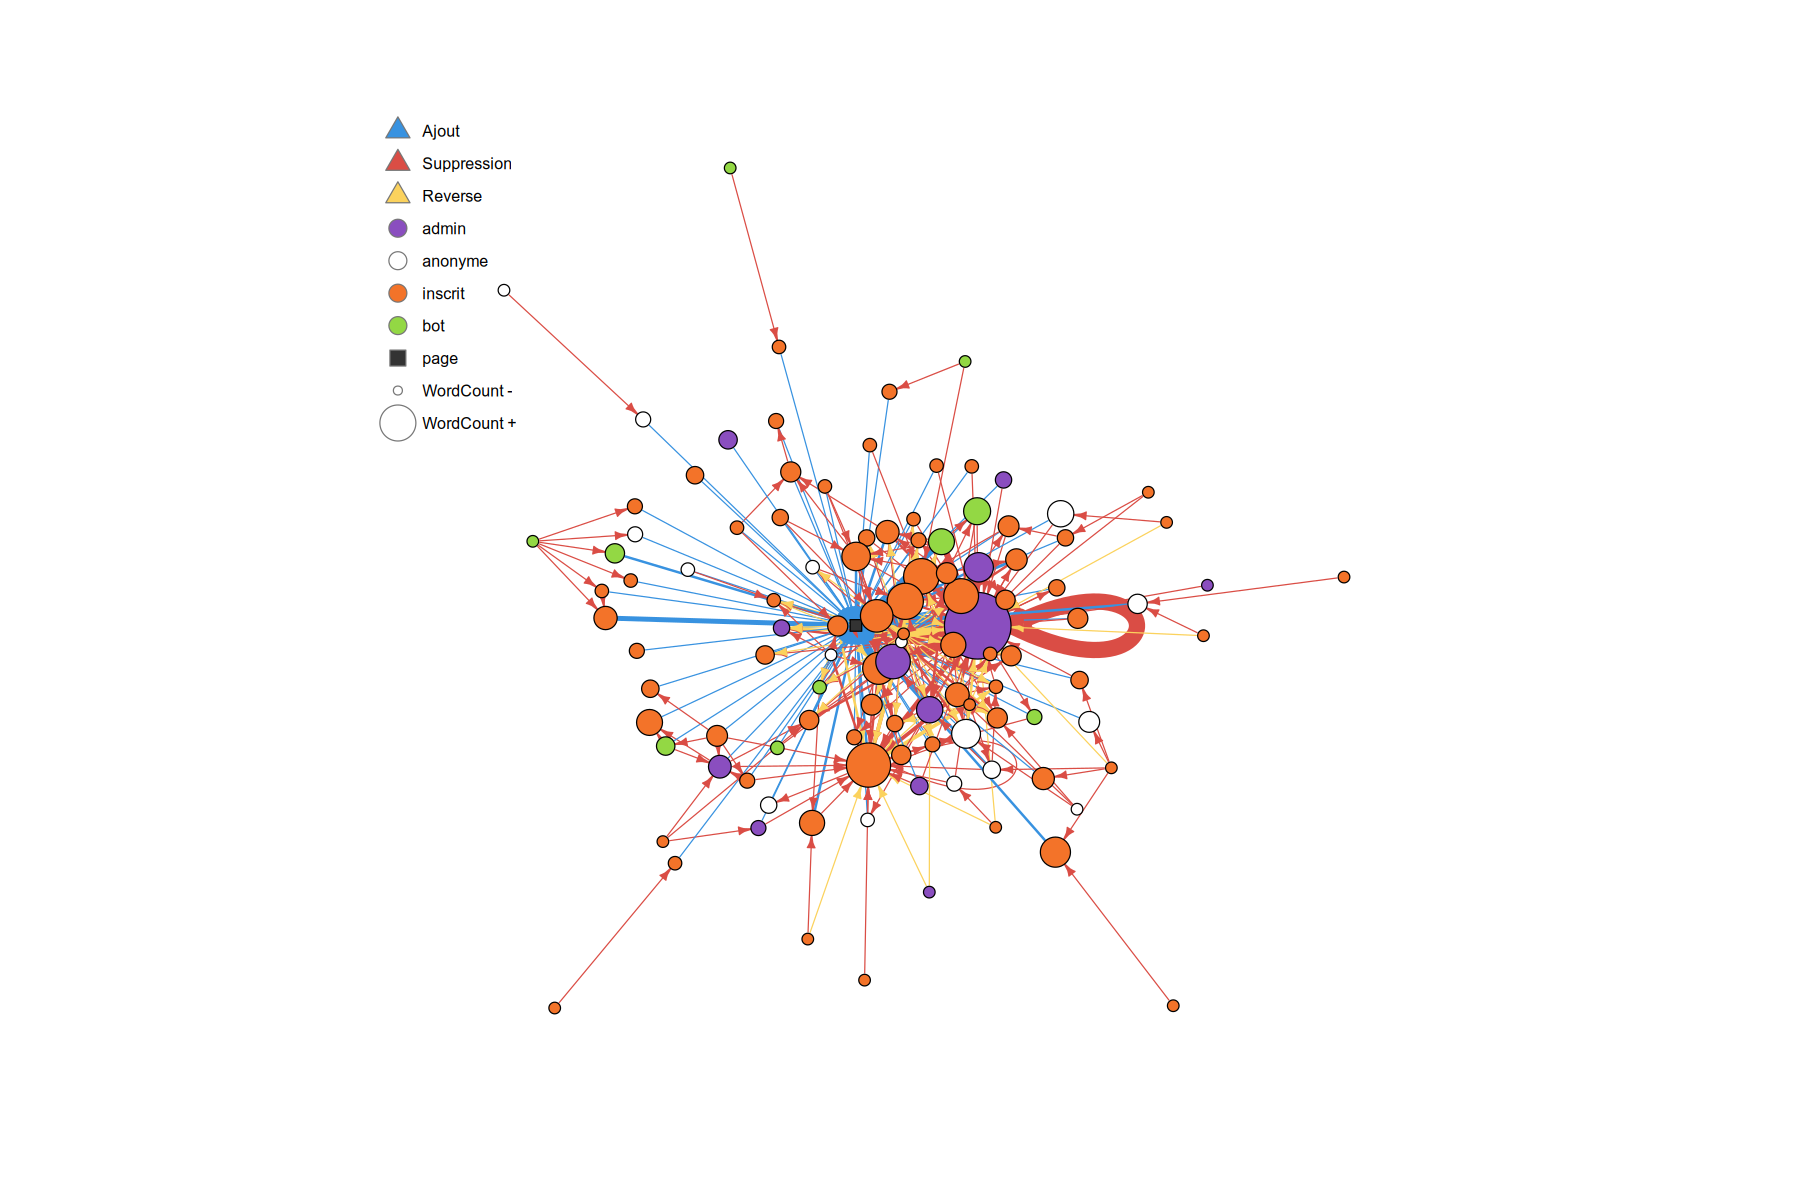

In [21]:
plot(zapata_rail_edit_graphe,
     edge.arrow.size = .3,
     edge.width = E(zapata_rail_edit_graphe)$IterationCount,
     edge.color = E(zapata_rail_edit_graphe)$Color_edge,
     vertex.size = log(V(zapata_rail_edit_graphe)$TotalWordCount + 4) * 2,
     vertex.color = V(zapata_rail_edit_graphe)$Color_nodes,
     vertex.label = NA,
     vertex.shape = V(zapata_rail_edit_graphe)$Page)


legend(x="topleft", c("Ajout","Suppression","Reverse","admin","anonyme","inscrit", "bot",
                      "page","WordCount -", "WordCount +"),
       pch=c(24,24,24,21,21,21,21,22,21,21),
       col="#777777", 
       pt.bg= c("#3892e0","#da4d45","#fbd25d","#8a4ebf","white","#f37329",
                "#93d844", "#333333", "white", "white"),
       pt.cex=c(2,2,2,2,2,2,2,2,1,4),
       cex=.8,
       bty="n",
       ncol=1)

## Calcul de metriques structurelles:

## La description du réseau dans son ensemble:

A partir de l'objet graphe, on peut calculer un certain nombre de metriques descriptives de la structure globale du réseau. On a déjà vu comment réccupérer le nombre de noeuds et de liens, mais on peu aussi regarder:

La densité:

In [22]:
graph.density(zapata_rail_edit_graphe)

[1] 0.03094245

Le nombre de composantes (combien de sous réseaux séparés composent notre réseau)

In [23]:
clusters(zapata_rail_edit_graphe)

$membership
                                Stavenn                                    Page 
                                      1                                       1 
                           217.12.16.48                            217.12.16.49 
                                      1                                       1 
                              Smallweed                    Birdingcuba64~enwiki 
                                      1                                       1 
                        CommonsDelinker                          84.122.202.216 
                                      1                                       1 
                                  Eubot                               Thijs!bot 
                                      1                                       1 
                 Rufous-crowned Sparrow                              Herbythyme 
                                      1                                       1 
                              Hesperian                                TDogg310 
                                      1                                       1 
                             Luckas-bot                                Innotata 
                                      1                                       1 
                              Jimfbleak                            Snowmanradio 
                                      1                                       1 
                                 Wetman                                   Rabo3 
                                      1                                       1 
                           Citation bot                              J. Spencer 
                                      1                                       1 
                          Encyclopædius                                MuZemike 
                                      1                                       1 
                                 Sasata                                  Ucucha 
                                      1                                       1 
                                Billare                            Gene Nygaard 
                                      1                                       1 
                             Bruinfan12                              Iridescent 
                                      1                                       1 
                         Citation bot 1                                 Tbhotch 
                                      1                                       1 
                               Amirobot                                Ugelefaf 
                                      1                                       1 
                             Stemonitis                                Totodu74 
                                      1                                       1 
                             Gemini1980                              CarsracBot 
                                      1                                       1 
                             Mr Stephen                                EmausBot 
                                      1                                       1 
                                  EauOo                               AnomieBOT 
                                      1                                       1 
                                 Addbot                       Materialscientist 
                                      1                                       1 
                       Timrollpickering                          PopularOutcast 
                                      1                                       1 
                            Mgiganteus1                           200.55.183.49 
                                      1                                       1 
                             GoingBatty                                 Monkbot 
                   

Le taux de réciprocité des liens (pour les graphes dirigés):

In [24]:
reciprocity(zapata_rail_edit_graphe)

[1] 0.0326087

La distance moyenne entre les noeuds:

In [25]:
average.path.length(zapata_rail_edit_graphe)

[1] 3.001293

Le diamètre (distance entre les deux noeuds les plus éloignés du réseau)

In [26]:
diameter(zapata_rail_edit_graphe)

[1] 9

L'eccentricité:

In [27]:
eccentricity(zapata_rail_edit_graphe)

Stavenn                                    Page 
                                      3                                       2 
                           217.12.16.48                            217.12.16.49 
                                      3                                       3 
                              Smallweed                    Birdingcuba64~enwiki 
                                      3                                       3 
                        CommonsDelinker                          84.122.202.216 
                                      3                                       3 
                                  Eubot                               Thijs!bot 
                                      4                                       3 
                 Rufous-crowned Sparrow                              Herbythyme 
                                      3                                       4 
                              Hesperian                                TDogg310 
                                      3                                       3 
                             Luckas-bot                                Innotata 
                                      3                                       3 
                              Jimfbleak                            Snowmanradio 
                                      3                                       3 
                                 Wetman                                   Rabo3 
                                      3                                       3 
                           Citation bot                              J. Spencer 
                                      3                                       3 
                          Encyclopædius                                MuZemike 
                                      3                                       3 
                                 Sasata                                  Ucucha 
                                      3                                       3 
                                Billare                            Gene Nygaard 
                                      3                                       3 
                             Bruinfan12                              Iridescent 
                                      3                                       4 
                         Citation bot 1                                 Tbhotch 
                                      3                                       3 
                               Amirobot                                Ugelefaf 
                                      3                                       3 
                             Stemonitis                                Totodu74 
                                      3                                       3 
                             Gemini1980                              CarsracBot 
                                      3                                       3 
                             Mr Stephen                                EmausBot 
                                      3                                       3 
                                  EauOo                               AnomieBOT 
                                      3                                       3 
                                 Addbot                       Materialscientist 
                                      4                                       3 
                       Timrollpickering                          PopularOutcast 
                                      3                                       3 
                            Mgiganteus1                           200.55.183.49 
                                      3                                       3 
                             GoingBatty                                 Monkbot 
                                      3                        

Le rayon:

In [28]:
radius(zapata_rail_edit_graphe)

[1] 2

La transitivité globale:

In [29]:
transitivity(zapata_rail_edit_graphe)

[1] 0.152742

La transitivité locale et moyenne:

In [30]:
trans_locale <- transitivity(zapata_rail_edit_graphe, type = "local")
mean(trans_locale, na.rm = T)

[1] 0.531939

Le nombre et la taille des cliques: (noeuds tous en interaction les uns avec les autres)

In [31]:
cl <- cliques(zapata_rail_edit_graphe, min=3)

length(cl)

largest_cliques(zapata_rail_edit_graphe) 

clique_num(zapata_rail_edit_graphe)

Warning message in cliques(zapata_rail_edit_graphe, min = 3):
“At igraph_cliquer.c:57 :Edge directions are ignored for clique calculations”


[1] 710

Warning message in largest_cliques(zapata_rail_edit_graphe):
“At cliques.c:1125 :directionality of edges is ignored for directed graphs”


[[1]]
+ 6/110 vertices, named, from 3ea6eb2:
[1] CyanoTex        Jimfbleak       Stavenn         Snowmanradio   
[5] WolfmanSF       Andrew Davidson

[[2]]
+ 6/110 vertices, named, from 3ea6eb2:
[1] 37.201.192.120  Jimfbleak       Stavenn         Snowmanradio   
[5] WolfmanSF       Andrew Davidson

[[3]]
+ 6/110 vertices, named, from 3ea6eb2:
[1] 89.242.66.131   Andrew Davidson Jimfbleak       WolfmanSF      
[5] Stavenn         Snowmanradio   

[[4]]
+ 6/110 vertices, named, from 3ea6eb2:
[1] Page         Jimfbleak    Tom.Reding   Snowmanradio Ucucha      
[6] WolfmanSF   

[[5]]
+ 6/110 vertices, named, from 3ea6eb2:
[1] Page         Jimfbleak    Totodu74     Innotata     WolfmanSF   
[6] Elliott.neal

[[6]]
+ 6/110 vertices, named, from 3ea6eb2:
[1] Page            Jimfbleak       Stavenn         Snowmanradio   
[5] WolfmanSF       Andrew Davidson


Warning message in clique_num(zapata_rail_edit_graphe):
“At cliques.c:1125 :directionality of edges is ignored for directed graphs”


[1] 6

## Nouveaux attributs des noeuds: variables de réseau et centralité:

En plus des métriques décrivant la structure globale du réseau, on peut calculer les différentes mesures de centralité (voir slides) pour chaque contributeur. On dispose ainsi d'un attribut supplémentaire, décrivant le rôle de chaque contribteur dans la structure du résau.

On peut ainsi calculer les demi-degrés intérieurs et extérieurs:

In [32]:
V(zapata_rail_edit_graphe)$DegIn <- degree(zapata_rail_edit_graphe, mode="in")
V(zapata_rail_edit_graphe)$DegOut <- degree(zapata_rail_edit_graphe, mode="out") 

Les décrire:

In [34]:
mean(V(zapata_rail_edit_graphe)$DegIn)
sd(V(zapata_rail_edit_graphe)$DegIn)

mean(V(zapata_rail_edit_graphe)$DegOut)
sd(V(zapata_rail_edit_graphe)$DegOut)

[1] 3.372727

[1] 9.964026

[1] 3.372727

[1] 4.601274

Et visualiser leur distribution:

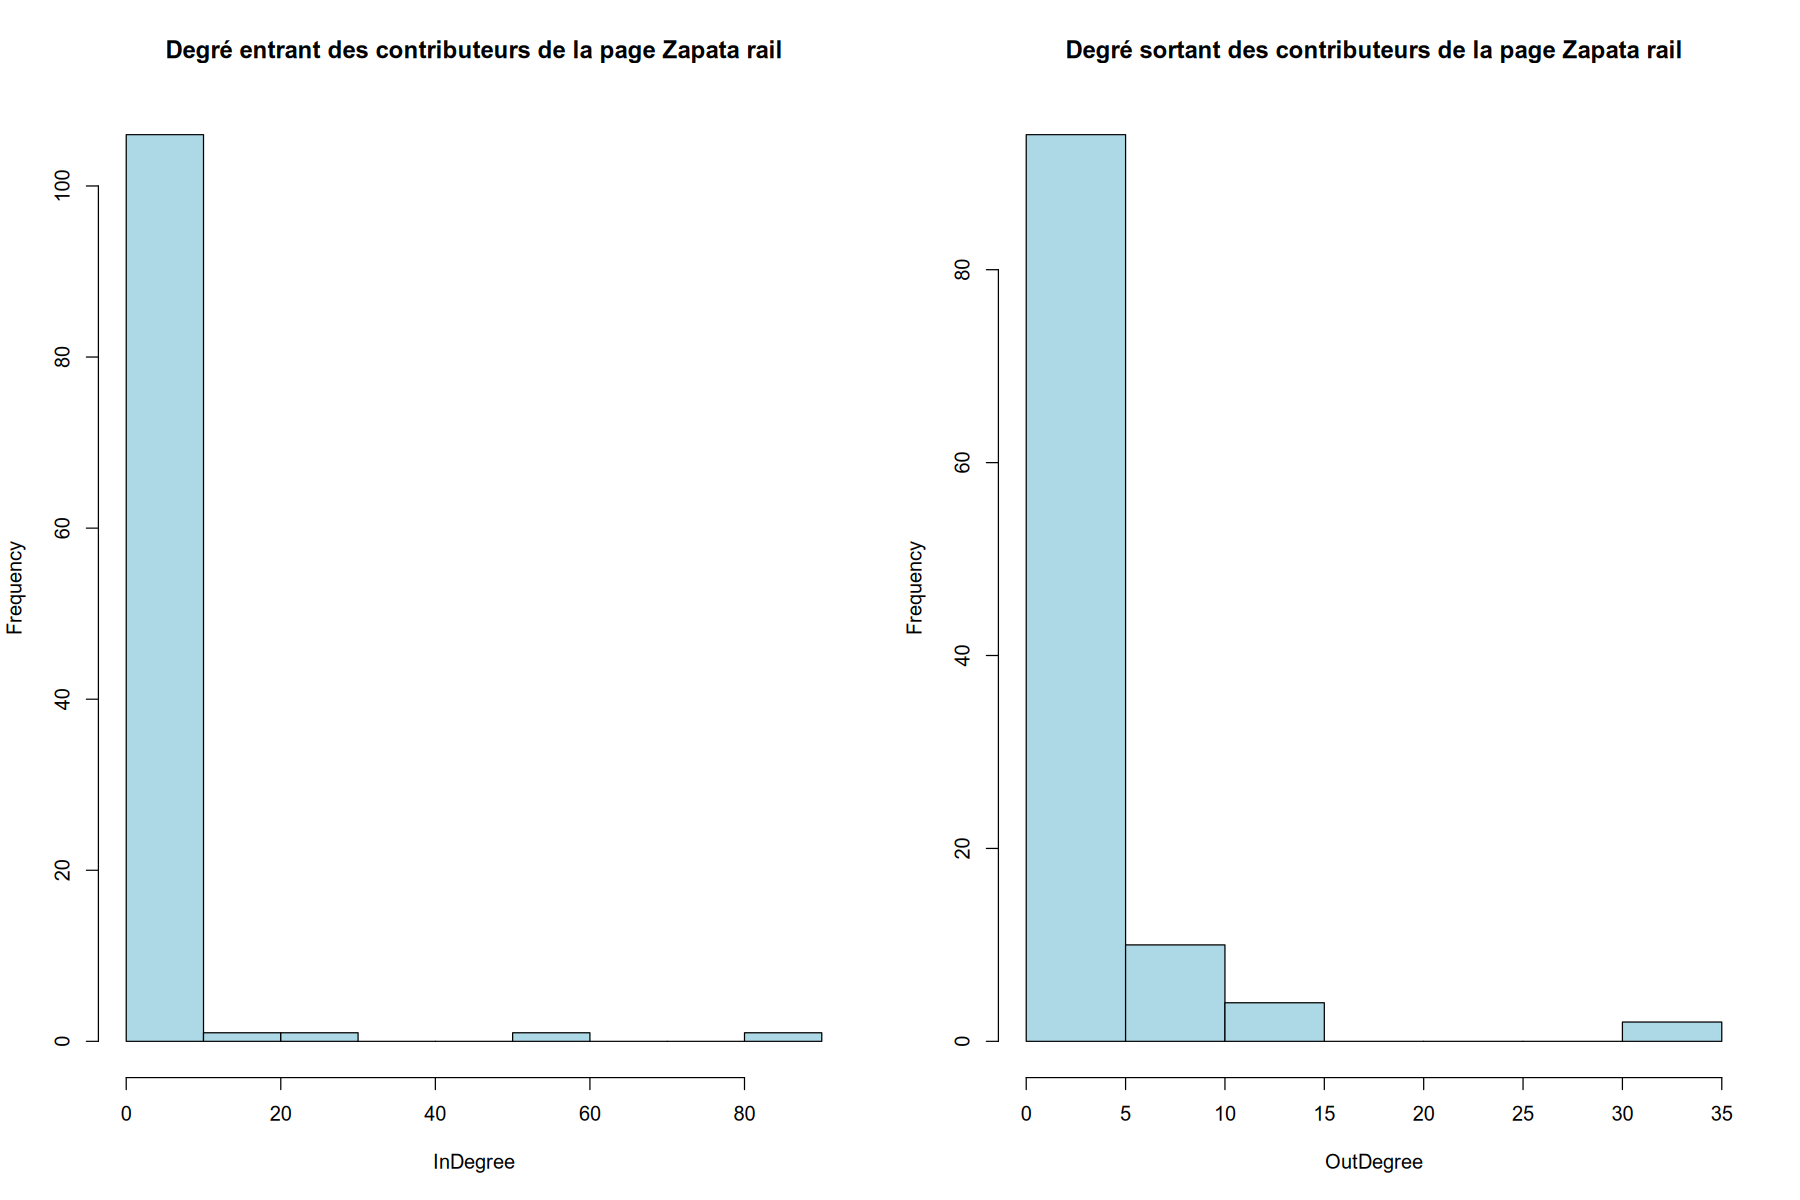

In [36]:
par(mfrow=c(1,2))

hist(V(zapata_rail_edit_graphe)$DegIn, col = "lightblue",
     main = "Degré entrant des contributeurs de la page Zapata rail",
     xlab = "InDegree")

hist(V(zapata_rail_edit_graphe)$DegOut, col = "lightblue",
     main = "Degré sortant des contributeurs de la page Zapata rail",
     xlab = "OutDegree")

par(mfrow=c(1,1))

On peut calculer la centralisation du réseau:

In [37]:
# Indegree

centr_degree(zapata_rail_edit_graphe, mode = "in", normalized = T)$centralization

# OutDegree 

centr_degree(zapata_rail_edit_graphe, mode = "out", normalized = T)$centralization

[1] 0.7672227

[1] 0.2626355

La centralité d'intermédiarité pour tous les noeuds:

In [38]:
V(zapata_rail_edit_graphe)$Bet <- betweenness(zapata_rail_edit_graphe, directed=TRUE, normalized = FALSE)

mean(V(zapata_rail_edit_graphe)$Bet)
sd(V(zapata_rail_edit_graphe)$Bet)

[1] 42.22727

[1] 178.9374

Pour finir par la centralité de vecteurs propres. Pour cela on a besoin de construire un graphe non orienté:

In [44]:
zapata_rail_edit_graphe_no <- graph.edgelist(as.matrix(zapata_rail_edit_edgelist[,2:3]), directed = F)

Puis on calcule la centralité d'intermédiarité:

[1] 16.81031

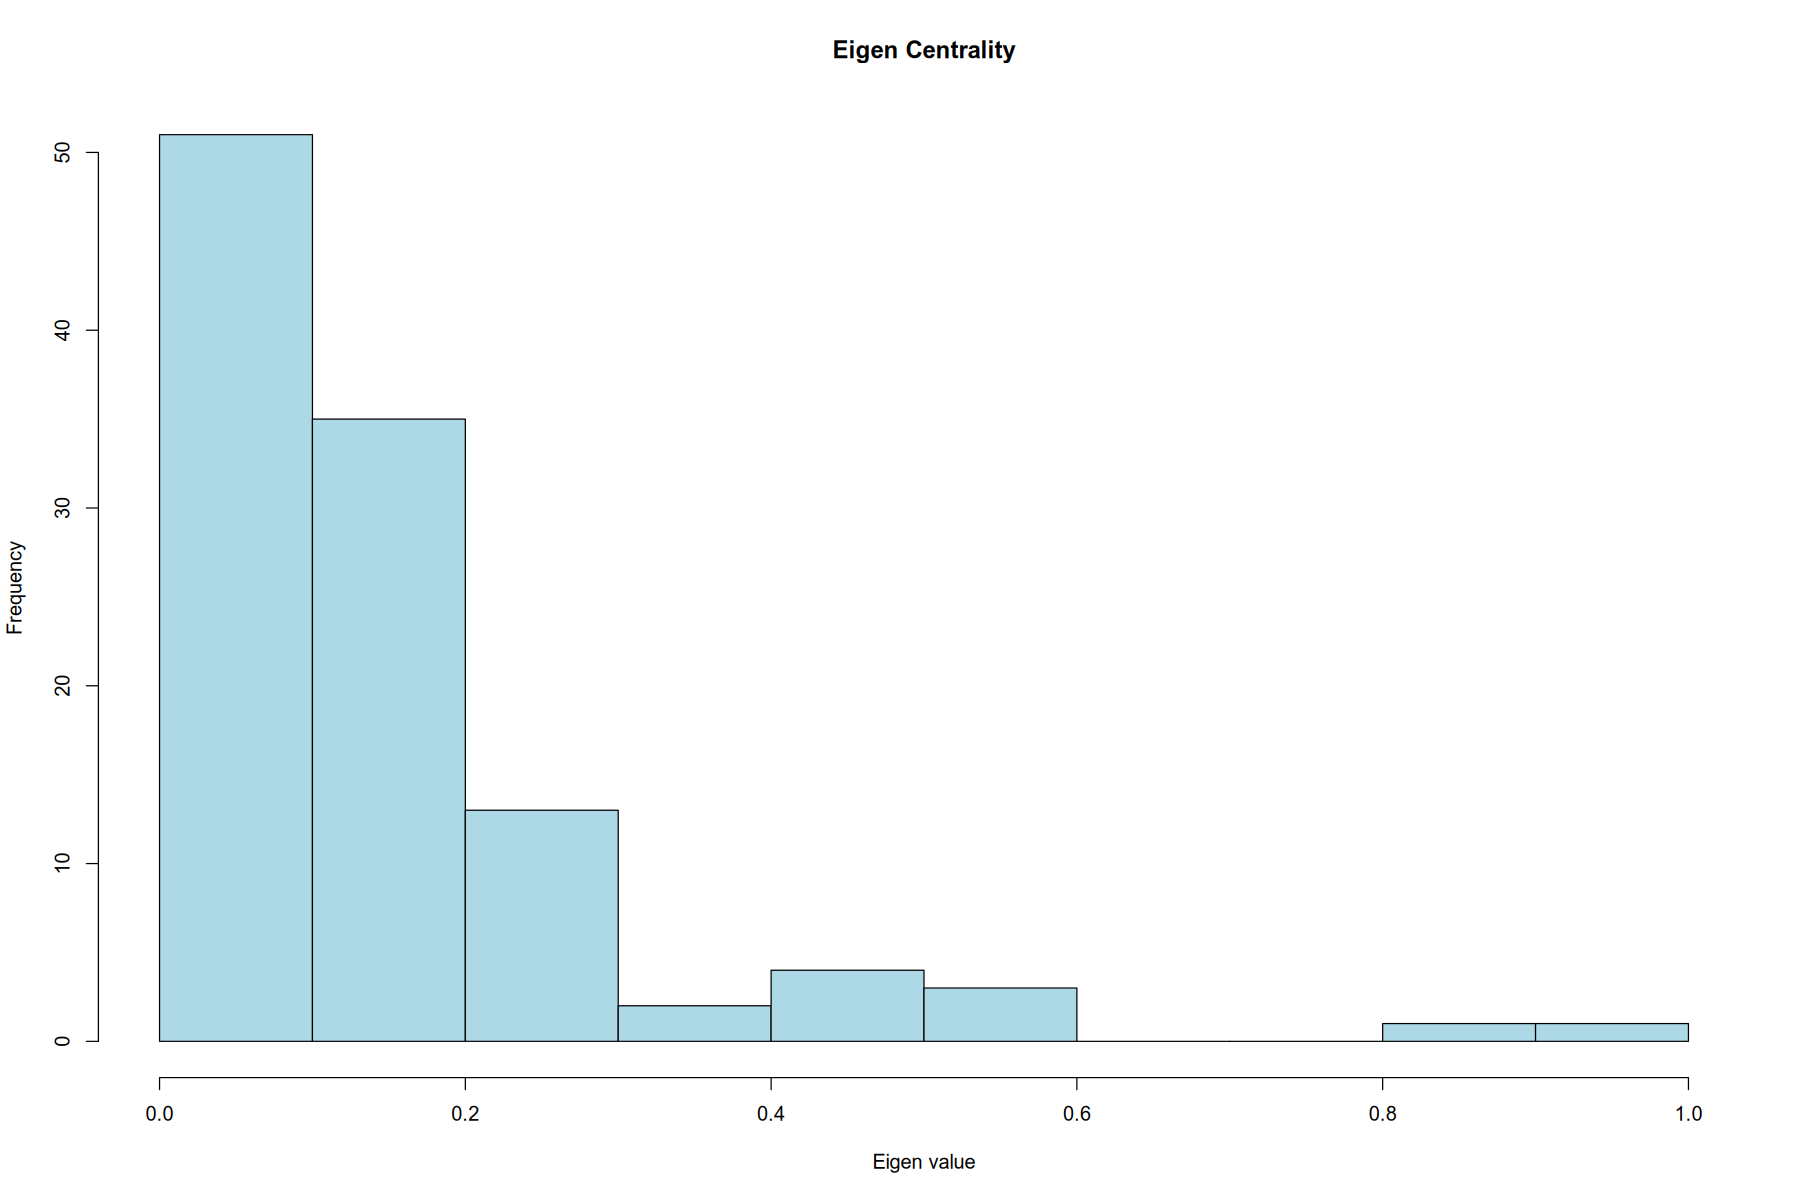

In [46]:
eigen_centrality(zapata_rail_edit_graphe_no, directed = FALSE)$value

hist(eigen_centrality(zapata_rail_edit_graphe_no, directed = FALSE)$vector, col = "lightblue",
     main = "Eigen Centrality", xlab = "Eigen value")